In [21]:
import numpy as np
from egcd import egcd

In [ ]:
https://wstein.org/edu/Fall2001/124/lectures/lecture23/lecture23.pdf
https://pi.math.cornell.edu/~hatcher/TN/TNbook.pdf



# Reduction

This is a version of the continued fraction algorithm 
for fractions.

1. $c < a$ do a flip  $[a,b,c] \mapsto [c,-b,a]$

1. $|b| < a$ let $k = \left [ \frac{a-b}{2a} \right ]$
   - $b \mapsto b + 2ka$
   - $c \mapsto c'$ <br>
   

In [297]:
def red(Q):
    '''recursively calculate the reduced form'''
    
    #should check that a,c > 0
    a,b,c = Q

    if abs(b) < a and a < c:
        return Q #finished
    elif c < a : 
        return red((c,-b,a))
        
    # this should only be calculated once
    D = b**2 - 4*a*c
    k = (a-b) // (2*a)
    b = b + 2*k*a
    return red( (a, b, (b**2 - D)//(4*a) ))
    

In [298]:
red((27,2,1))

(1, 0, 26)

In [289]:
disc((27,2,1))

-104

In [196]:
class QF():
    def __init__(self,x):
        a, b, c = x
        self.D = b**2 - 4*a*c

    def __mul__(self,other):
        pass

    def root(self):
        return (-self.b + 1J*self.D)/2
        

    def __str__(self):
        return f'{self.a}, {self.b}, {self.c}'

In [12]:
print(Q((1,2,3)))

1, 2, 3


# Bob's Lemmas

**Lemma**


# Gauss composition


A pair of forms $[a_1, b, a_2c]$ and $[a_2, b, a_1c]$ is said to be concordant.


For two forms to be concordant is obviously a very strong condition since not only are the
second coefficients of the two forms equal, but also the first coefficient of each form
divides the third coefficient of the other form. Furthermore, the discriminants of the
two forms are equal. Conversely, suppose that two forms 
$[a_1, b, c_1]$ and $[a_2, b, c_2]$
with the same middle coefficient have the same discriminant. 

Then $$a_1c_1 = a_2c_2$$,
so if a1 divides c2
, say c2 = a1c for some integer c , then 
$$a_1c_1 = a_2c_2 =  a_2a_1c$$
so in particular 
$a_1c_1 = a_2a_1c$, and since a1
is nonzero we can cancel it from this
equation to get $c_1 = a_2c$ . 
The two forms are thus [a1, b, a2c] and [a2 , b, a1c] so
they are concordant. 

This argument shows in fact that for two forms $[a1, b, c1]$ and
$[a2, b, c2]$ of the same discriminant, if a1 divides c2
then it automatically follows that
a2 divides c1
.


**Lemma 7.1.**

1. If the concordant forms $[a_1, b, a_2c]$ and $[a_2, b, a_1c]$ are primitive then
so is their product and $[a_1,a_2, b, c]$. 
1. If $a_1$ and $a_2$ are coprime then the converse is also
true: 
If $[a_1,a_2, b, c]$ is primitive then so are $[a_1, b, a_2c]$ and $[a_2, b, a_1c]$

---

**Lemma 7.3**. For each pair of forms $Q_i = [a_i,b_i,c_i]$ of the
same discriminant with $a_1$ and $a_2$ coprime there exists a pair of forms 
$[a_1, b, a_2c]$ and $[a_2, b, a_1c]$ that are concordant to each other and properly equivalent to $Q_1$
and $Q_2$
respectively.

---

**Proposition 7.4.** For a fixed discriminant let $Q_1,Q_2$ be a pair of concordant primitive forms 
and let $Q'_1,Q′_2$ be another such pair 
properly equivalent to $Q_1$ and $Q_2$
respectively. 

Then the products $Q_1Q_2$ and $Q′_1Q′_2$ are properly equivalent.

## Inversion trick


So $Q = [a,b,c]$ and $Q' = [c,-b,a]$ are properly equivalent (and primitive)
so $a,c$ are coprime and one can compute 
$$Q,Q' = Q^2$$
by finding equivalent concordant forms.

---


$$Q_1 = [1,0,26], Q_2 = [2,0,13], Q_2 = [3,2,9], Q_4 = [5,4,6] $$


The product $Q_4Q_4 = Q^2_4$
, can be computed in the same way using
the regions in the topograph of $Q_4$ with the coprime labels 5 and 6. For the edges
bordering the 5 region the labels starting with the edge between the 5 and 6 regions
are 4, 14, 24, · · ·. For the edges bordering the 6 region we can start with the same
edge but now this edge must be oriented in the opposite direction in order to have
the 6 region on our left as we move forward. The edge labels are then −4, 8, 20, · · ·.
Continuing these arithmetic progressions a little farther we find the common label 44
on the edge between the 5 and 102 regions, and on the edge between the 6 and 85
regions. Thus we have the concordant forms [5, 44, 102] and [6, 44, 85], with product
[30, 44, 17]. The coefficients 30 and 17 appear in adjacent regions in the topograph
of $Q_3$
so $Q^2_4$
is properly equivalent to either $Q_3$ or the mirror image form. 

In [102]:
def disc(x):
    a,b,c = x
    return b**2 - 4*a*c

In [101]:
disc((2,2,3))

-20

In [66]:
D = disc((1,0,5))

In [105]:
X = (1,0,5)
Y = (2,2,3)

In [59]:
_,m,n = egcd(a,-A)

In [71]:
bb = m*(b-B) + b

In [70]:
 disc((1,2,6))

-20

In [72]:
(-20 - bb**2)//4

-6

(2, 2, 3)

In [293]:
def comp(Q1,Q2):
    A,B,C = red(Q1)
    a,b,c = red(Q2)
    
    D = B**2 - 4*A*C
    d = b**2 -4*a*c
    #only defined if disc(Q1) = disc(Q1)
    if D != d : raise(ValueError)

    # A*A1 + a*a1 = gcd
    #should check A>0, a>0
    gcd,A1,a1 = egcd(A,a)

    #A and a should be coprime
    if gcd != 1:
        if C % A == 0:
            return (A*A, B, C//A)
        else:
            a,b,c = c,-b,a

    #find a value of b that makes the forms concurrent
    gcd,A1,a1 = egcd(A,a)
    #x is only defined up to addition with 2*k*a
    x = A1*(b-B) % (2*a)
    print(x)
    bb = A*x + B
    return red((a*A, bb, (bb**2 - D) // (4*a*A) ))
    
    

In [350]:
X = [2,0,13]
XX = 
Y = [3,-2,9]
Z = [5,-4,6]

PP = comp(X,Z)
PP, disc(PP)

8


((3, -2, 9), -104)

In [361]:
A,B,C = X
a,b,c = Y

D = B**2 -4*A*C
gcd,A1,a1 = egcd(A,a)
#x is only defined up to addition with 2*k*a
x = A1*(b-B) % (2*a)  #+ 2*a
print(x)
bb = A*x + B 
PP = (a*A, bb, (bb**2 - D) // (4*a*A) )
X1  = (A, bb, (bb**2 - D) // (4*A) )
X2 = (a, bb, (bb**2 - D) // (4*a) )
print(X1,X2, PP)   


2
(2, 4, 15) (3, 4, 10) (6, 4, 5)


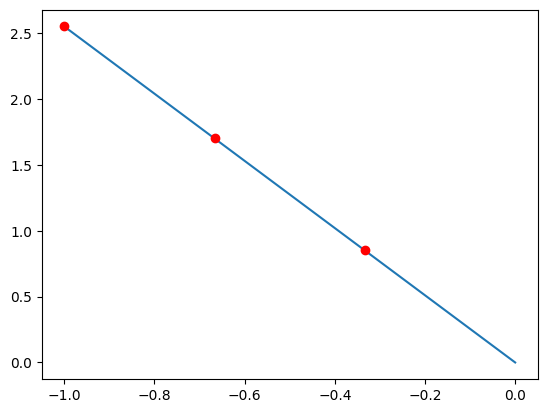

In [363]:
Z = np.array([root(X1), root(X2), root(PP)])
import matplotlib.pyplot as plt

ZZ = np.array([Z[0],0])
plt.plot(ZZ.real,ZZ.imag)
plt.plot(Z.real,Z.imag,'ro');


In [362]:
root(X1), root(X2), root(PP)

((-1+2.5495097567963922j),
 (-0.6666666666666666+1.6996731711975948j),
 (-0.3333333333333333+0.8498365855987974j))

In [327]:
-104/8

-13.0

In [334]:
def root(Q):
    a,b,c = Q
    return (-b + 1J*np.sqrt(-b*b + 4*a*c) ) / (2*a)

In [317]:
root(X)

5.0990195135927845j